In [1]:
%cd /content/drive/My\ Drive/PROJET
import projet_etu as l
from mltools import plot_data, plot_frontiere, make_grid, load_usps, get_usps, show_usps
import numpy as np
import matplotlib.pyplot as plt
from Loss import BCELoss, MSELoss, CELoss
import projet_etu  as nn
from keras.datasets import mnist
import torchvision
from sklearn.utils import shuffle
import time 
from sklearn.manifold import TSNE
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#%load_ext autoreload
#%autoreload 2


[Errno 2] No such file or directory: '/content/drive/My Drive/PROJET'
/content


ModuleNotFoundError: ignored

In [26]:
def t_sne(X,y):
    feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
    df = pd.DataFrame(X,columns=feat_cols)
    df['y'] = y
    df['label'] = df['y'].apply(lambda i: str(i))
    X, y = None, None

    np.random.seed(42)
    rndperm = np.random.permutation(df.shape[0])

    N = 10000
    df_subset = df.loc[rndperm[:N],:].copy()
    data_subset = df_subset[feat_cols].values

    time_start = time.time()
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(data_subset)
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


    df_subset['tsne-2d-one'] = tsne_results[:,0]
    df_subset['tsne-2d-two'] = tsne_results[:,1]
    #df_subset['tsne-3d-three'] = tsne_results[:,2]
    
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue="y",
        palette=sns.color_palette("hls", 10),
        data=df_subset,
        legend="full",
        alpha=0.3
    )
    plt.show()

Mounted at /content/drive


# Nouvelle section

In [16]:
(train_X, y), (test_X, yh) = mnist.load_data()

train_X = train_X.reshape(train_X.shape[0], train_X.shape[1]**2) / 255.0
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1]**2) / 255.0


test_X =test_X[:20000]

In [17]:

linear1 = nn.Linear(784,512)
lin1    = nn.Linear(512,128)
linear2 = nn.Linear(128,10)
linear3 = nn.Linear(10,128)
lin3    = nn.Linear(128,512)
linear4 = nn.Linear(512,784)

######

linear1 = nn.Linear(784,100)
linear2 = nn.Linear(100,10)
linear3 = nn.Linear(10,100)
linear4 = nn.Linear(100,784)


linear9 = nn.Linear(784,2500)
linear10 = nn.Linear(2500, 2000)
linear11 = nn.Linear(2000, 1500)
linear12 = nn.Linear(1500,1000)
linear13 = nn.Linear(1000,500)
linear14 = nn.Linear(500, 10)

linear15 = nn.Linear(10,500)
linear16 = nn.Linear(500, 1000)
linear17 = nn.Linear(1000, 1500)
linear18 = nn.Linear(1500,2000)
linear19 = nn.Linear(2000,2500)
linear20 = nn.Linear(2500, 784)

In [18]:

sig = nn.Sigmoide()
tan = nn.TanH()
softmax  = nn.softmax()

L = [linear9,tan, linear10, tan, linear11, linear12, tan, linear13, tan, linear14, linear15, tan, linear16, tan,linear17, linear18, tan, linear19, tan, linear20, sig]

In [19]:
loss = BCELoss()
hist_loss = []



print("TRAIN.......")


L1 = [linear1, tan, linear2, tan]
L2 = [linear3, tan, linear4, sig]
L = L1 + L2
seq = nn.Sequentiel(L)

TRAIN.......


In [ ]:
hist_loss = nn.SGD(seq, train_X , train_X, 600, 200, loss, eps = 1e-4)

### constructed

In [21]:
X = seq.forward(test_X).reshape(-1,28,28)

### affichage

(10000, 28, 28)


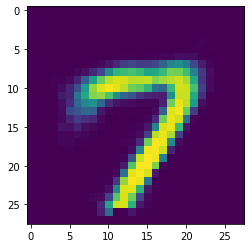

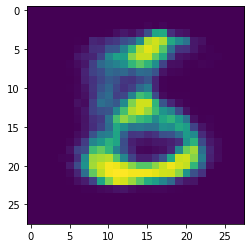

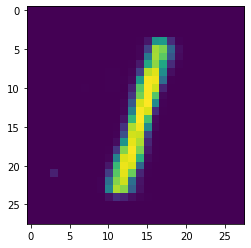

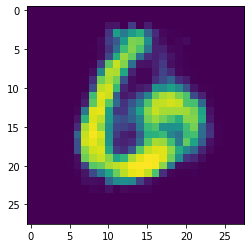

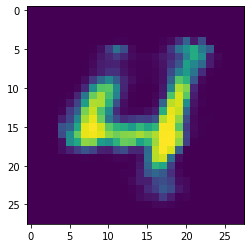

In [ ]:
print(np.shape(X))
for i in range(5):
    fig = plt.figure
    plt.imshow(X[i])
    plt.show()

### plot t_sne

/home/sarah/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/sarah/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.005s...
[t-SNE] Computed neighbors for 10000 samples in 8.144s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.494967
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.135635
[t-SNE] KL divergence after 300 iterations: 2.656966
t-SNE done! Time elapsed:

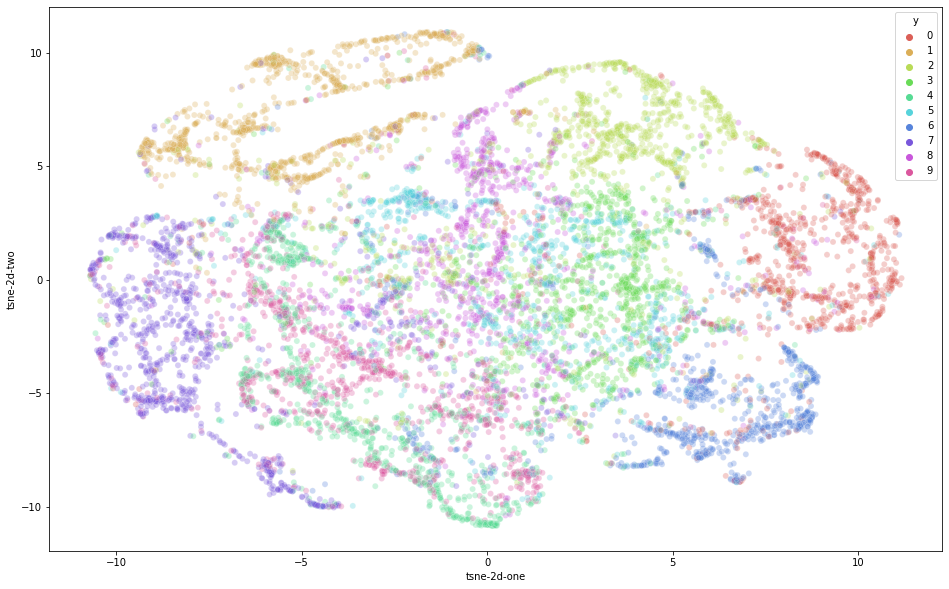

In [ ]:
X = seq.forward(test_X).reshape(-1,28*28)
t_sne(X,yh[:10000])

/home/sarah/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/sarah/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.004s...
[t-SNE] Computed neighbors for 10000 samples in 5.894s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.494967
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.103905
[t-SNE] KL divergence after 300 iterations: 2.272050
t-SNE done! Time elapsed:

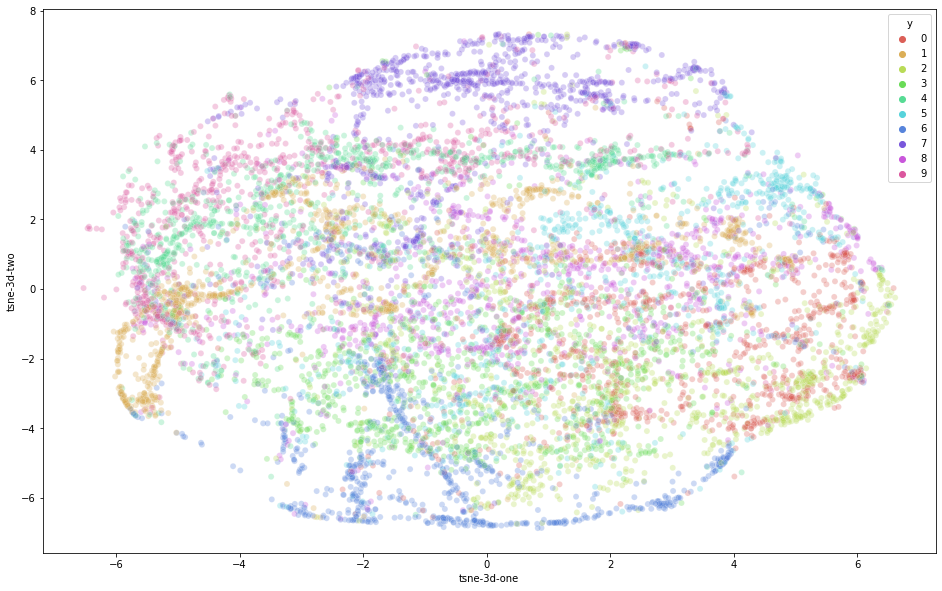

In [ ]:
t_sne(X,yh[:10000])

### plot cost

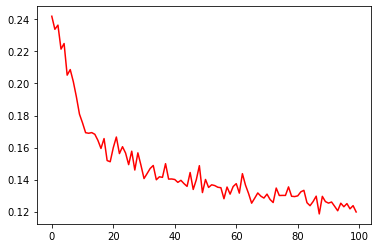

In [ ]:
plt.figure()
plt.plot(list(range(100)) , hist_loss, 'r-')
plt.show()

### classification

In [33]:
train_X_clf = X[:5000]
test_X_clf = X[5000:]

train_y_clf = yh[:5000]
test_y_clf = yh[5000:]


y_train_sparse = np.zeros((train_y_clf.size,10))
y_train_sparse[np.arange(train_y_clf.size),train_y_clf] = 1

y_test_sparse = np.zeros((test_y_clf.size,10))
y_test_sparse[np.arange(test_y_clf.size),test_y_clf] = 1


linear1 = nn.Linear((train_X.shape[1]),128)
linear2 = nn.Linear(128,64)
linear3 = nn.Linear(64,10)
linear4 = nn.Linear(64,10)

tan = nn.TanH()
sig = nn.Sigmoide()
softmax = nn.softmax()
loss = CELoss()

p_loss = []

L = [linear1,tan,linear2,tan,linear3]
seq = nn.Sequentiel(L)


hist_loss = nn.SGD(seq,train_X_clf, y_train_sparse, 5, 5000, loss, eps = 1e-4)

7.600182072012553
epoch :  0 iteration : 0  loss : 7.600182072012553
5.870111692234825
epoch :  0 iteration : 1  loss : 5.870111692234825
5.090369701063341
epoch :  0 iteration : 2  loss : 5.090369701063341
4.510021789747182
epoch :  0 iteration : 3  loss : 4.510021789747182
4.0570939126098615
epoch :  0 iteration : 4  loss : 4.0570939126098615
3.733842579501423
epoch :  0 iteration : 5  loss : 3.733842579501423
3.494741636809521
epoch :  0 iteration : 6  loss : 3.494741636809521
3.30193262590111
epoch :  0 iteration : 7  loss : 3.30193262590111
3.1425314218452285
epoch :  0 iteration : 8  loss : 3.1425314218452285
3.0057731995436723
epoch :  0 iteration : 9  loss : 3.0057731995436723
2.884717636993679
epoch :  0 iteration : 10  loss : 2.884717636993679
2.775161571883951
epoch :  0 iteration : 11  loss : 2.775161571883951
2.674662995207168
epoch :  0 iteration : 12  loss : 2.674662995207168
2.582015863771101
epoch :  0 iteration : 13  loss : 2.582015863771101
2.496513834874895
epoch : 

KeyboardInterrupt: ignored

In [31]:
print(np.shape(hist_loss))

(5,)


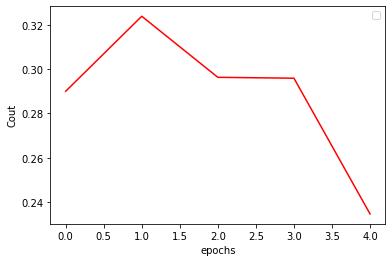

Accuracy  : 0.6684


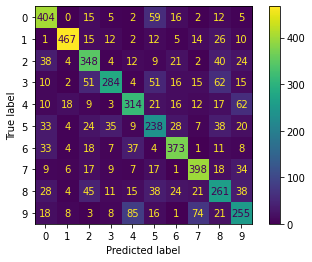

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
def predict_multi(input):
    yhat = L[0].forward(input)
    for i in range(1,len(L)):
        yhat = L[i].forward(yhat)

    yhat = softmax.forward(yhat)
    yhaat = np.zeros(len(input))

    for i in range(len(yhat)):
        yhaat[i] = np.argmax(yhat[i])
    return yhaat

y_pred = predict_multi(test_X_clf)

plt.figure()
plt.legend("Variation du cout par epoch")
plt.xlabel("epochs")
plt.ylabel("Cout")
plt.plot(list(range(5)), hist_loss, 'r-')
plt.show()

print("Accuracy  :" , np.where(y_pred != test_y_clf, 0, 1).mean())
ConfusionMatrixDisplay.from_predictions( test_y_clf, y_pred, labels = np.arange(10) )
plt.show()

(10000, 28, 28)


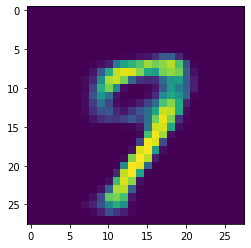

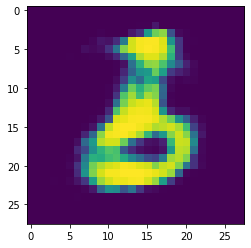

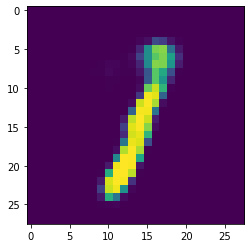

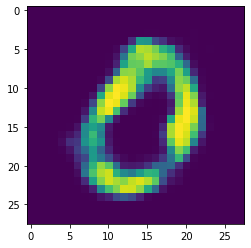

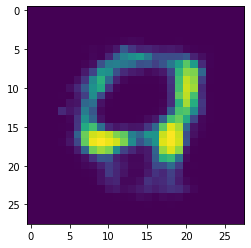

In [22]:
print(np.shape(X))
for i in range(5):
    fig = plt.figure
    plt.imshow(X[i])
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.008s...
[t-SNE] Computed neighbors for 10000 samples in 5.360s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.464403
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.634460
[t-SNE] KL divergence after 300 iterations: 2.876272
t-SNE done! Time elapsed:

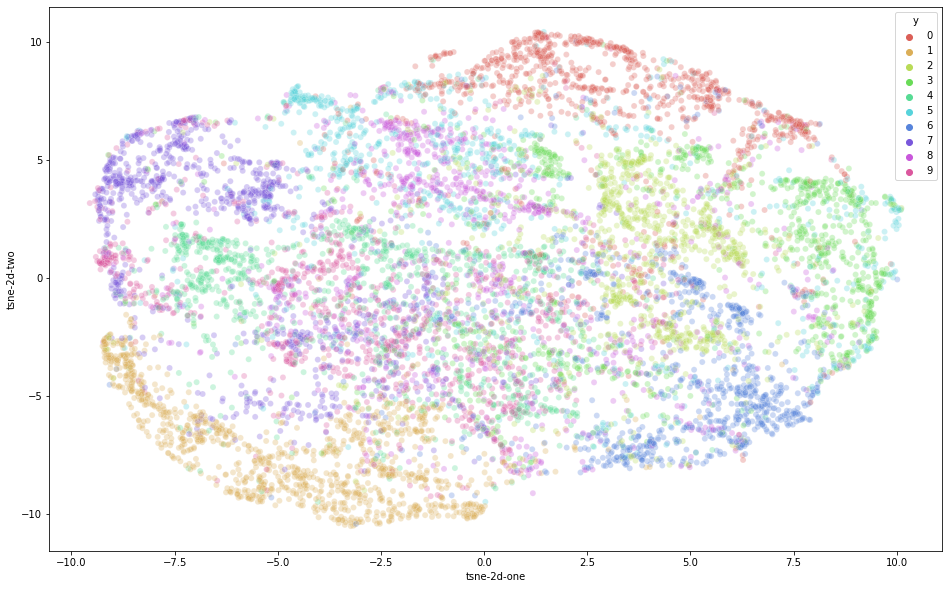

In [27]:
X = seq.forward(test_X).reshape(-1,28*28)
t_sne(X,yh[:20000])

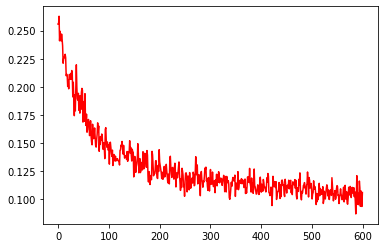

In [29]:
plt.figure()
plt.plot(list(range(600)) , hist_loss, 'r-')
plt.show()